# Grid Search Results

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import joblib

In [2]:
sb.set_theme()

## Random Forest Regression

File is too large size to be uploaded to GitHub.

In [157]:
with open("../Output/grid_search_8_large.joblib", "rb") as f:
    grid_search_results = joblib.load(f)

In [112]:
df = pd.DataFrame(grid_search_results.cv_results_)

In [158]:
grid_search_results.best_params_

{'model__max_samples': 1.0, 'model__n_estimators': 175}

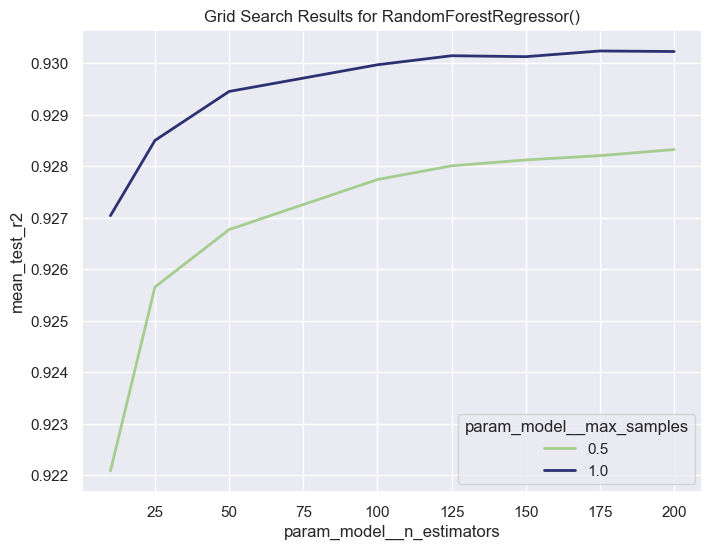

In [159]:
sb.set_theme("notebook", "darkgrid", font_scale=1, 
             rc={"lines.linewidth": 2, "figure.figsize": (8, 6)})
ax = sb.lineplot(data=df, x="param_model__n_estimators", y="mean_test_r2", hue="param_model__max_samples", palette="crest")
ax.set_title("Grid Search Results for RandomForestRegressor()")
plt.show()

In [160]:
df = df.sort_values("rank_test_r2")
df.sort_values("mean_fit_time")[["rank_test_r2", "param_model__max_samples", "param_model__n_estimators", "mean_fit_time", "mean_test_r2"]]

,rank_test_r2,param_model__max_samples,param_model__n_estimators,mean_fit_time,mean_test_r2
0,16,0.5,10,45.878618,0.922085
8,13,1.0,10,65.200822,0.927043
1,15,0.5,25,78.865224,0.925657
9,7,1.0,25,103.501546,0.928503
2,14,0.5,50,116.338184,0.926772
10,6,1.0,50,153.876555,0.929453
3,12,0.5,100,177.516659,0.927743
4,11,0.5,125,207.537855,0.928010
5,10,0.5,150,236.830895,0.928124
11,5,1.0,100,250.733894,0.929971


Picked 50 estimators because the `mean_test_r2` gain is negligible after 50 estimators. 

In [172]:
df[df["rank_test_r2"] == 6][["rank_test_r2", "param_model__max_samples", "param_model__n_estimators", "mean_fit_time", "mean_test_r2"]]

,rank_test_r2,param_model__max_samples,param_model__n_estimators,mean_fit_time,mean_test_r2
10,6,1.0,50,153.876555,0.929453


## XGBRegressor

File is too large size to be uploaded to GitHub.

In [10]:
with open("../Output/grid_search_8_large_xgb", "rb") as f:
    grid_search_results_xgb = joblib.load(f)

In [11]:
df_xgb = pd.DataFrame(grid_search_results_xgb.cv_results_)

In [12]:
grid_search_results_xgb.best_params_

{'model__learning_rate': 0.15,
 'model__max_depth': 10,
 'model__n_estimators': 150}

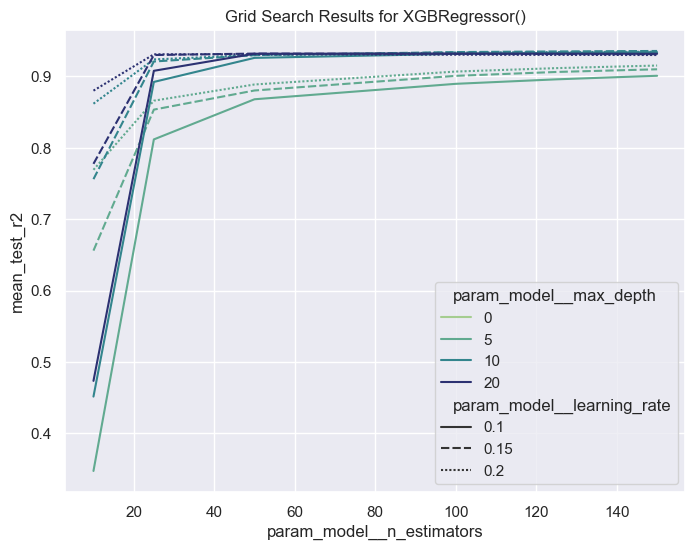

In [13]:
sb.set_theme("notebook", "darkgrid", font_scale=1, 
             rc={"lines.linewidth": 1.5, "figure.figsize": (8, 6)})
ax = sb.lineplot(data=df_xgb, x="param_model__n_estimators", y="mean_test_r2", style="param_model__learning_rate", hue="param_model__max_depth", palette="crest")
ax.set_title("Grid Search Results for XGBRegressor()")
plt.show()

In [14]:
df_xgb = df_xgb[df_xgb["param_model__max_depth"] != 0]
df_xgb = df_xgb.sort_values("rank_test_r2")
df_xgb[df_xgb["mean_test_r2"] >= 0.93].sort_values("mean_fit_time")[["rank_test_r2", "param_model__learning_rate", "param_model__max_depth", "param_model__n_estimators", "mean_fit_time", "mean_test_r2"]]

,rank_test_r2,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,mean_fit_time,mean_test_r2
67,19,0.2,20,25,101.089347,0.930665
39,5,0.15,10,100,130.150632,0.933805
63,7,0.2,10,100,131.682894,0.933175
15,14,0.1,10,100,138.481207,0.931298
68,18,0.2,20,50,145.980418,0.930811
64,4,0.2,10,125,150.313036,0.933819
40,2,0.15,10,125,151.241653,0.934689
44,10,0.15,20,50,151.390908,0.931692
16,8,0.1,10,125,159.646790,0.932631
20,12,0.1,20,50,160.796201,0.931468


Picked the following set of hyperparameters.

In [15]:
df_xgb[df_xgb["rank_test_r2"] == 2][["rank_test_r2", "param_model__learning_rate", "param_model__max_depth", "param_model__n_estimators", "mean_fit_time", "mean_test_r2"]]

,rank_test_r2,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,mean_fit_time,mean_test_r2
40,2,0.15,10,125,151.241653,0.934689
